In [1]:
# 라이브러리 추가
import pandas as pd
import requests; from urllib.parse import urlparse
import seaborn as sns
import matplotlib; import matplotlib.pyplot as plt
import squarify
import numpy as np
import re
import networkx as nx

In [2]:
# 카카오 검색 API: 블로그 검색 함수
def kakao_api_blog(keyword, page):
    url = "https://dapi.kakao.com/v2/search/blog?&query=" + keyword + "&size=50" + "&page=" + str(page)
    result = requests.get(urlparse(url).geturl(),
                          headers={"Authorization":"KakaoAK 4d25f7ae6c4cab6bc96c746280e403af"})
    json_obj = result.json()
    return json_obj

In [3]:
# 블로그 검색결과 데이터프레임
list=[]; keyword = "깃대종"; page = 1
while page <= 50:
    json_obj = kakao_api_blog(keyword, page)
    for document in json_obj['documents']:
        val = [document['title'].replace("<b>","").replace("</b>",""),
              document['contents'].replace("<b>","").replace("</b>",""),
              document['blogname'], document['datetime'], document['url']]
        list.append(val)
    if json_obj['meta']['is_end'] is True: break
    page += 1
    
# 블로그 검색결과 데이터프레임
df1 = pd.DataFrame(list, columns = ['title', 'contents', 'name', 'datetime', 'url'])
df1.head(10)

,title,contents,name,datetime,url
0,국립공원 깃대종뱃지 21종 모두 획득!!,국립공원공단에서 2018년 10월 23일부터 2019년 05월 31일까지 깃대종뱃지...,Reptilica,2019-05-29T07:00:00.000+09:00,http://blog.naver.com/PostView.nhn?blogId=9lif...
1,호반새 육추 - 계룡산 깃대종,호반새 - 계룡산국립공원 깃대종 여름철 울창한 숲에서 들려 오는 호르르르르~륵 호반...,계룡산 닷컴,2015-08-03T16:19:00.000+09:00,http://gyeryongsan.com/129
2,국립공원 깃대종 식물,국립공원 깃대종 식물 동북아난대숲문화원장 황호림 Ⅰ. 깃대종이란? 1. 깃대종의 개...,Forest Storyteller 황호림의 [라온제나],2019-02-21T16:14:00.000+09:00,http://blog.naver.com/PostView.nhn?blogId=easy...
3,깃대종(국립공원 그린포인트),"서식지, 그리고 그곳에 남겨진 뜻깊은 유적지 등을 포괄한다 (위키백과사전 펌) 우리...",산. 들. 강과.바다. 자연과 함께..(공사중),2019-03-05T22:53:00.000+09:00,http://blog.daum.net/1tiger_kang/6600346
4,국립공원 깃대종뱃지 18종,월출산 깃대종 -나뚜기 ​ 북한산 깃대종 -오색이 ​ 계룡산 깃대종 -호반이 ​ 치...,밥 대신 커피인생,2019-02-19T11:13:00.000+09:00,http://blog.naver.com/PostView.nhn?blogId=yume...
5,한라산국립공원 대표 생물은? 한라산 깃대종 선정!,뚝나비 선정 - 세계유산본부 한라산국립공원은 한라산의 생태·문화·지리적 특성을 띤 ...,제주세계자연유산센터,2019-07-01T09:45:00.000+09:00,http://blog.naver.com/PostView.nhn?blogId=wnhj...
6,생태계의 보고 깃대종 서식지,"한다. 버들치를 중고기라고도 하는데, 물속에서 헤엄치고 있어도 손으로 쉽게 잡을 수...",이기행,2018-11-27T14:30:00.000+09:00,https://brunch.co.kr/@leekih111/31
7,깃대종이란,깃대종이란 한 지역의 생태계를 대표하는 중요하고 특징적인 동·식물을 일컫는 말. 이...,머문 바 없이 그마음을 내다,2010-09-02T08:16:00.000+09:00,http://blog.naver.com/PostView.nhn?blogId=phar...
8,내장산 깃대종 진노랑상사화,피어있어요 공사중이라 안에 들어 갈수가 없고 ​ 길옆에 피어나는 상사화를 원적암으로...,가득채우지말기를(계영기원),2019-07-31T17:24:00.000+09:00,http://blog.naver.com/PostView.nhn?blogId=doob...
9,카카오 검색 API를 이용한 &#39;깃대종&#39; 블로그/카페 검색 가시화,안녕하세요? 이번 글은 카카오 검색 API를 이용하여 &#39;깃대종&#39;에 관...,"GGRS: Geoscience, GIS, & Remote Sensing",2019-09-08T15:14:00.000+09:00,http://blog.daum.net/geoscience/1412


In [4]:
print('깃대종 블로그: ' + str(len(df1)) + '건')

깃대종 블로그: 572건


In [5]:
# 카카오 검색 API: 카페 검색 함수
def kakao_api_cafe(keyword, page):
    url = "https://dapi.kakao.com/v2/search/cafe?&query=" + keyword + "&size=50" + "&page=" + str(page)
    result = requests.get(urlparse(url).geturl(),
                          headers={"Authorization":"KakaoAK 4d25f7ae6c4cab6bc96c746280e403af"})
    json_obj = result.json()
    return json_obj

In [6]:
# 카페 검색결과 데이터프레임
list=[]; keyword = "깃대종"; page = 1
while page <= 50:
    json_obj = kakao_api_cafe(keyword, page)
    for document in json_obj['documents']:
        val = [document['title'].replace("<b>","").replace("</b>",""),
              document['contents'].replace("<b>","").replace("</b>",""),
              document['cafename'].replace("&lt;","").replace("&gt;",""), document['datetime'], document['url']]
        list.append(val)
    if json_obj['meta']['is_end'] is True: break
    page += 1
    
# 카페 검색결과 데이터프레임
df2 = pd.DataFrame(list, columns = ['title', 'contents', 'name', 'datetime', 'url'])
df2.head(10)

,title,contents,name,datetime,url
0,발칵 뒤집은 장태산 이끼도롱뇽 – 대전깃대종이야기1,"좌,우로 이동가능합니다. 깃대종(Flagship Species) 그 지역의 생태적·...",한밭문화마당,2019-08-01T17:08:03.000+09:00,http://cafe.daum.net/snd2003/4ocl/137
1,대전시가 ﻿깃대종 후보생물을 발표하였습니다.,대전시가 깃대종 후보생물을 발표하였습니다. 6개분류군 18종입니다. 저희는 하늘다람...,행복을 찾는사람들(행복봉사회),2019-06-01T06:07:38.000+09:00,http://cafe.daum.net/kja2026/TuR1/273
2,깃대종 (Flagship Species),깃대종 (Flagship Species) 깃대종은 1993년 국제연합환경계획(UNE...,사단법인 빛명상,2010-08-11T01:29:14.000+09:00,http://cafe.daum.net/webucs/4Gcg/99
3,깃대종 12251226 매경,자연환경지에 가면 반드시 보전해야 라는 동식물을 하나씩 정해 놓고 있다. 깃대종(f...,마이클성,2018-12-26T00:11:38.000+09:00,http://cafe.daum.net/sungcoco/60Ki/5304
4,깃대종(Flagship species)이란,깃대종이란 생태계의 여러 종 가운데 사람들이 중요하다고 인식하는 생물종을 말한다. ...,자연과 더불어 살아가는 사람들,2012-12-25T11:05:11.000+09:00,http://cafe.daum.net/retunature/LFu3/33
5,&#39;깃대종 친구들&#39; 애니메이션으로 자연보전 교육하세요,▷ 국립공원 깃대종 캐릭터로 교육용 애니매이션 개발 및 배포 환경부 산하 국립공원관...,작은 숲 속 이야기,2018-11-23T09:24:08.000+09:00,http://cafe.daum.net/lafonef/DMIW/290
6,방재욱-깃대종을 지켜주세요,www.freecolumn.co.kr 깃대종을 지켜주세요! 2015.12.07 20...,김가배시인 문학별장,2015-12-10T01:32:38.000+09:00,http://cafe.daum.net/gabae22/89gs/600
7,국립공원의 깃대종을 아시나요,국립공원의 깃대종 선정 (Korea National Park Flagship Spe...,BCTP 산악회,2008-12-04T17:40:39.000+09:00,http://cafe.daum.net/yyk5607/1HPq/42
8,“7대 깃대종”을 선정해 주십시오,수원 지역 생태계 보전과 회복의 상징 “7대 깃대종”을 선정해 주십시오. 수원의 생...,서호천의 친구들,2012-07-30T18:00:32.000+09:00,http://cafe.daum.net/hachunsaligi/LVjZ/416
9,하지 마!&#34; - 녹색연합과 함께하는 대한민국 깃대종 (여름),아끼는 마음을 갖게 되기를 간절히 바랍니다. ｜녹색연합과 함께하는 대한민국 깃대종｜...,크레용하우스 아이들을 위한 좋은 책을 만드는 곳!,2013-09-09T13:33:06.000+09:00,http://cafe.daum.net/crayonhouse.co.kr/8RBP/201


In [7]:
print('깃대종 카페: ' + str(len(df2)) + '건')

깃대종 카페: 910건


In [8]:
# 데이터프레임 연결
df = pd.concat([df1, df2], axis=0)
print('깃대종 블로그, 카페: ' + str(len(df)) + '건')

깃대종 블로그, 카페: 1482건


In [9]:
# 카카오 API 검색결과를 엑셀파일로 저장
df.to_excel('D:/GEODATA/kakao_blog_cafe.xlsx')

In [10]:
# 카카오 API 검색결과
df = pd.read_excel('D:/GEODATA/kakao_blog_cafe.xlsx', sheet_name='Sheet1',
                   index_col='datetime', parse_dates=True).drop(['Unnamed: 0'], axis=1)

In [11]:
# 연도별 블로그, 카페 건수
shapes = df.groupby(df.index.year).size().reset_index()
shapes.columns = ['year', 'total']
shapes.sort_values("year", ascending=False).head(5)

,year,total
16,2019,318
15,2018,209
14,2017,99
13,2016,101
12,2015,150


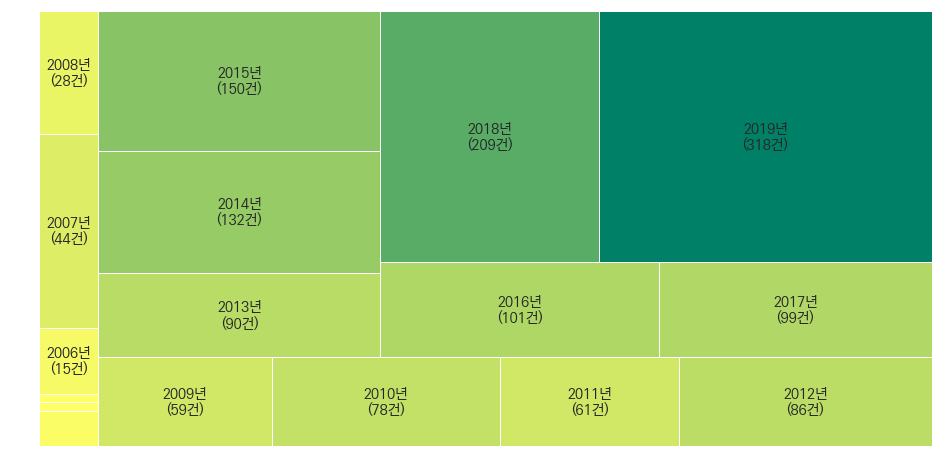

In [12]:
# 색상지도 정규화
cmap = matplotlib.cm.summer_r
norm = matplotlib.colors.Normalize(vmin=shapes.total.min(), vmax=shapes.total.max())
colors = [cmap(norm(value)) for value in shapes.total]

# 연도별 블로그, 카페 건수 트리맵
sns.set(style='darkgrid', font='KoPubDotum', font_scale=1.2)
plt.figure(figsize=(16,8)); plt.axis('off')
squarify.plot(
    sizes=shapes.total,
    color=colors,
    label=shapes.apply(lambda x: str(x.year) + '년\n(' + str(x.total) + '건)' if x.total >= 10 else '', axis=1),
    alpha=1)
plt.savefig('D:/GEODATA/IMG01.png', bbox_inches='tight')

In [13]:
# 가장 많은 '깃대종' 글을 올린 블로그, 카페
shapes = df.groupby(df['name']).size().reset_index()
shapes.columns = ['name', 'total']
shapes.sort_values("total", ascending=False).head(5)

,name,total
1051,태백산 jumok,17
252,길동지기,9
913,장산 반딧불이 보존 동아리,6
957,좋은글과 좋은음악이 있는곳,6
541,사)소벌생태문화연구소,5


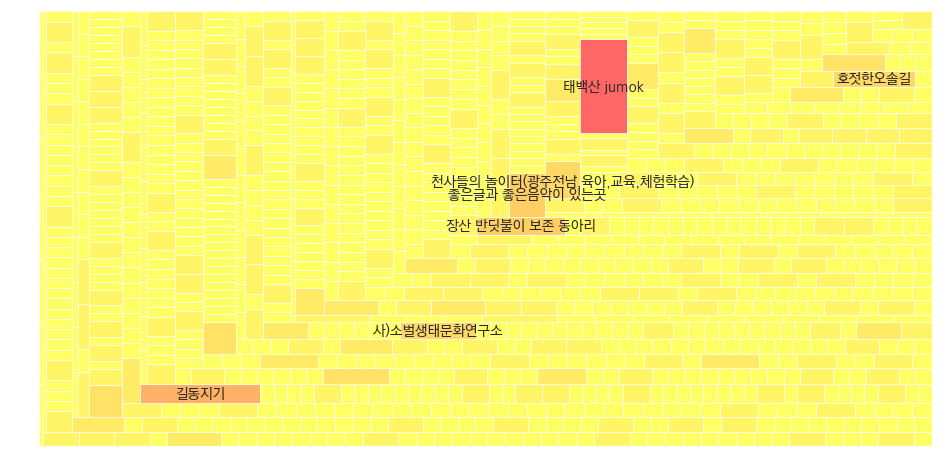

In [14]:
# 색상지도 정규화
cmap = matplotlib.cm.autumn_r
norm = matplotlib.colors.Normalize(vmin=shapes.total.min(), vmax=shapes.total.max())
colors = [cmap(norm(value)) for value in shapes.total]

# 가장 많은 '깃대종' 글을 올린 블로그, 카페 트리맵
sns.set(style='darkgrid', font='KoPubDotum', font_scale=1.2)
plt.figure(figsize=(16,8)); plt.axis('off')
squarify.plot(
    sizes=shapes.total,
    color=colors,
    label=shapes.apply(lambda x: x['name'] if x.total >= 5 else '', axis=1),
    alpha=0.6)
plt.savefig('D:/GEODATA/IMG02.png', bbox_inches='tight')